In [28]:
import numpy as np
import matplotlib.pyplot as plt


# ADC parameters initialization

N_BITS = 8
N_CODES = 2**N_BITS
V_REF = 1.0
LSB = V_REF / N_CODES

def ideal_adc(vin):
    """Ideal uniform ADC"""
    codes = np.floor(vin / LSB)
    return np.clip(codes, 0, N_CODES-1).astype(int)

In [29]:
# Ramp input
vin_ramp = np.linspace(0, V_REF, 200_000)

# Sine input (full scale, centered)
t = np.linspace(0, 2*np.pi, 200_000)
vin_sine = 0.5 + 0.5*np.sin(t)

In [30]:
def plot_hist(codes, title):
    plt.figure(figsize=(8,4))
    plt.hist(codes, bins=N_CODES, density=True)
    plt.title(title)
    plt.xlabel("ADC Code")
    plt.ylabel("Probability Density")
    plt.show()

In [31]:
# Create non-uniform thresholds (DNL)
np.random.seed(0)
dnl_error = 0.2 * LSB * (np.random.rand(N_CODES+1) - 0.5)
thresholds = np.cumsum(np.ones(N_CODES+1)*LSB + dnl_error)
thresholds -= thresholds[0]
thresholds *= V_REF / thresholds[-1]  # normalize

def dnl_adc(vin):
    return np.digitize(vin, thresholds) - 1

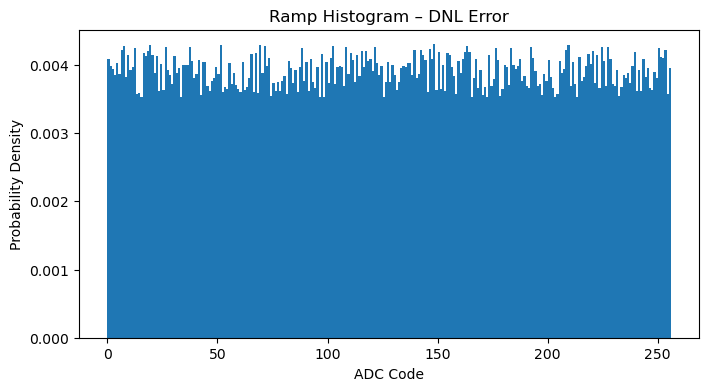

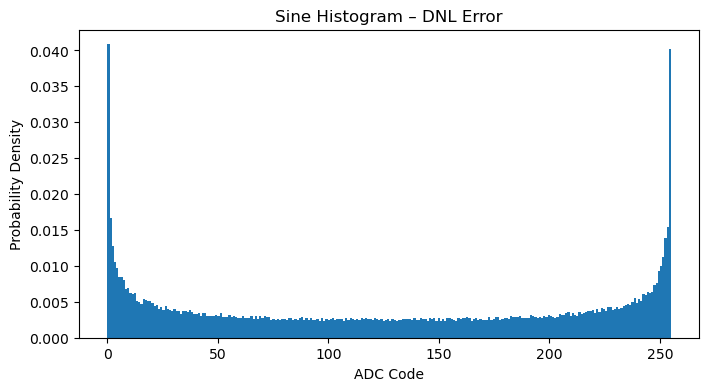

In [32]:
codes_ramp = dnl_adc(vin_ramp)
plot_hist(codes_ramp, "Ramp Histogram – DNL Error")

codes_sine = dnl_adc(vin_sine)
plot_hist(codes_sine, "Sine Histogram – DNL Error")

In [33]:
missing_codes = [50, 120]

thresholds_mc = np.delete(thresholds, missing_codes)

def missing_code_adc(vin):
    return np.digitize(vin, thresholds_mc) - 1


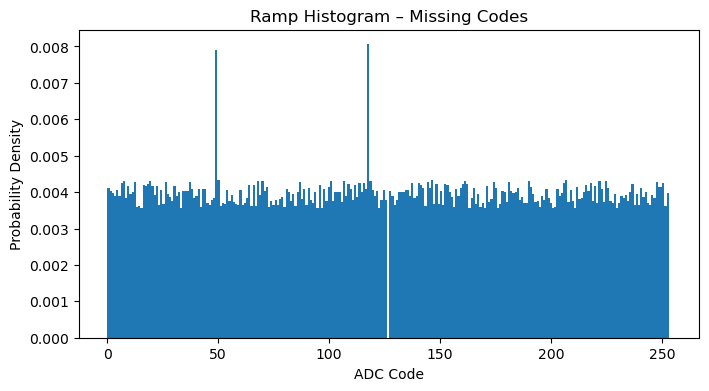

In [34]:
codes_ramp = missing_code_adc(vin_ramp)
plot_hist(codes_ramp, "Ramp Histogram – Missing Codes")

In [35]:
OFFSET = 0.05  # volts

def offset_adc(vin):
    vin_off = vin + OFFSET
    return ideal_adc(vin_off)

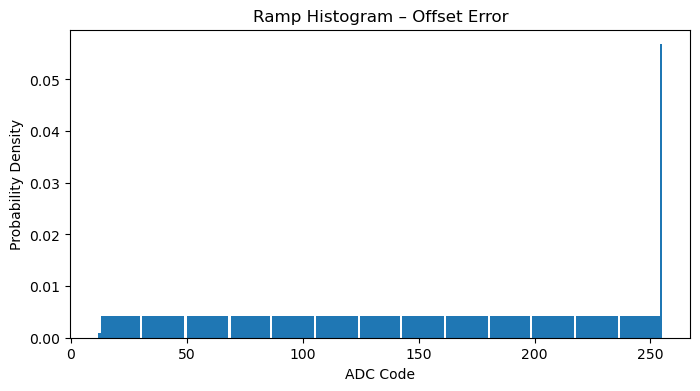

In [36]:
codes_ramp = offset_adc(vin_ramp)
plot_hist(codes_ramp, "Ramp Histogram – Offset Error")

In [37]:
GAIN = 0.9 

def gain_adc(vin):
    vin_gain = GAIN * vin
    return ideal_adc(vin_gain)

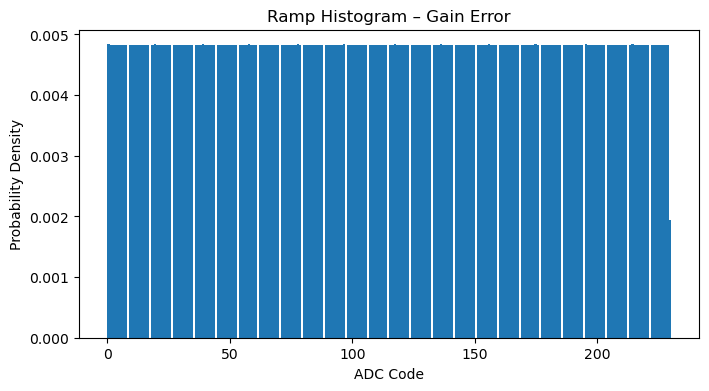

In [38]:
codes_ramp = gain_adc(vin_ramp)
plot_hist(codes_ramp, "Ramp Histogram – Gain Error")

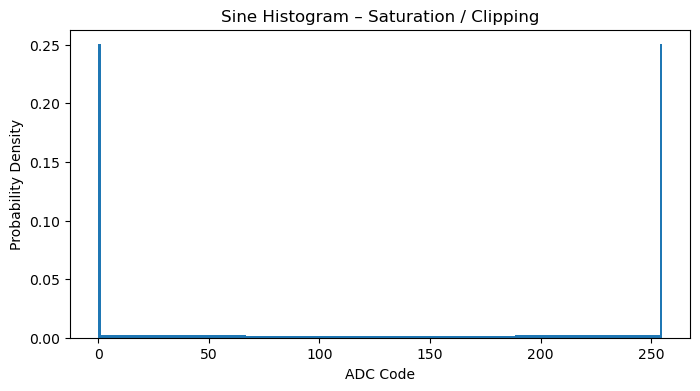

In [39]:
vin_sine_sat = 0.5 + 0.7*np.sin(t)  # exceeds [0,1]

codes_sine = ideal_adc(vin_sine_sat)
plot_hist(codes_sine, "Sine Histogram – Saturation / Clipping")
